# **Modelo Predictivo de Bitcoin**

## Importando Librerias





In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
!pip install kagglehub

In [18]:
import kagglehub

kagglehub.login()


## Lectura del DataFrame por medio de KaggleHub

In [19]:
# Download latest version
path = kagglehub.dataset_download("mczielinski/bitcoin-historical-data/versions/282")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/bitcoin-historical-data


In [20]:
df_original = pd.read_csv("/kaggle/input/bitcoin-historical-data/btcusd_1-min_data.csv")
df = df_original.copy()
df

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
1,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
2,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
3,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
4,1.325412e+09,4.58,4.58,4.58,4.58,0.000000
...,...,...,...,...,...,...
7096046,1.751244e+09,108794.00,108794.00,108794.00,108794.00,0.027868
7096047,1.751244e+09,108794.00,108800.00,108793.00,108800.00,0.514892
7096048,1.751245e+09,108800.00,108800.00,108783.00,108798.00,0.014182
7096049,1.751245e+09,108797.00,108797.00,108716.00,108732.00,0.091704


In [31]:
"""
Manera Tradicional de importar el dataset

¿Por qué no así?
El dataset está constantemente siendo actualizado, por lo que se necesita una manera de acceder a la misma versión siempre que se ejecute el código.
¿Quién asegura que el usuario conseda el archivo correcto al momento de proveerle el acceso a colab?
Es por eso que se accede a la misma versión desde kaggle, utilizando la librería kagglehub y estableciendo una versión específica del dataset.

Sin embargo, para comodidad y preferencia del lector, se deja esta opcion de lectura de dataset.
"""
#df_original = pd.read_csv("")
#df = df_original.copy()
#df


'\nManera Tradicional de importar el dataset\n\n¿Por qué no así?\nEl dataset está constantemente siendo actualizado, por lo que se necesita una manera de acceder a la misma versión siempre que se ejecute el código.\n¿Quién asegura que el usuario conseda el archivo correcto al momento de proveerle el acceso a colab?\nEs por eso que se accede a la misma versión desde kaggle, utilizando la librería kagglehub y estableciendo una versión específica del dataset.\n\nSin embargo, para comodidad y preferencia del lector, se deja esta opcion de lectura de dataset.\n'

## Análisis exploratorio de los datos

In [22]:
#Verificando cantidad de datos nulos
df.isnull().sum()

,0
Timestamp,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [23]:
# Descripcion Estadistica
df.describe()

,Timestamp,Open,High,Low,Close,Volume
count,7.096051e+06,7.096051e+06,7.096051e+06,7.096051e+06,7.096051e+06,7.096051e+06
mean,1.538295e+09,1.845042e+04,1.845751e+04,1.844311e+04,1.845042e+04,5.247183e+00
std,1.229098e+08,2.573331e+04,2.574120e+04,2.572524e+04,2.573329e+04,2.239144e+01
min,1.325412e+09,3.800000e+00,3.800000e+00,3.800000e+00,3.800000e+00,0.000000e+00
25%,1.431853e+09,4.298100e+02,4.299800e+02,4.295500e+02,4.298200e+02,1.793871e-02
50%,1.538294e+09,6.746290e+03,6.750000e+03,6.741800e+03,6.746150e+03,4.546070e-01
75%,1.644734e+09,2.832500e+04,2.833200e+04,2.831800e+04,2.832400e+04,3.000000e+00
max,1.751245e+09,1.119930e+05,1.120000e+05,1.119670e+05,1.119750e+05,5.853852e+03


In [24]:
# Columnas del dataset
df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [25]:
# Tamaño del dataset
df.shape

(7096051, 6)

In [26]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7096051 entries, 0 to 7096050
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 324.8 MB


### Conversión de datos a datetime

In [27]:
df["Datetime"] = pd.to_datetime(df["Timestamp"], unit="s")
df["Date"] = df["Datetime"].dt.date

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7096051 entries, 0 to 7096050
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Timestamp  float64       
 1   Open       float64       
 2   High       float64       
 3   Low        float64       
 4   Close      float64       
 5   Volume     float64       
 6   Datetime   datetime64[ns]
 7   Date       object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 433.1+ MB


In [28]:
df

,Timestamp,Open,High,Low,Close,Volume,Datetime,Date
0,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:01:00,2012-01-01
1,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:02:00,2012-01-01
2,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:03:00,2012-01-01
3,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:04:00,2012-01-01
4,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,2012-01-01 10:05:00,2012-01-01
...,...,...,...,...,...,...,...,...
7096046,1.751244e+09,108794.00,108794.00,108794.00,108794.00,0.027868,2025-06-30 00:47:00,2025-06-30
7096047,1.751244e+09,108794.00,108800.00,108793.00,108800.00,0.514892,2025-06-30 00:48:00,2025-06-30
7096048,1.751245e+09,108800.00,108800.00,108783.00,108798.00,0.014182,2025-06-30 00:49:00,2025-06-30
7096049,1.751245e+09,108797.00,108797.00,108716.00,108732.00,0.091704,2025-06-30 00:50:00,2025-06-30


### Reducciendo columnas y agrupando por día

In [29]:
df_diario = df.groupby("Date")[["Open", "High", "Low", "Close"]].mean()
df_diario["Volume"] = df.groupby("Date")["Volume"].sum()
df_diario

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-01,4.645697,4.645697,4.645697,4.645697,10.000000
2012-01-02,4.975000,4.975000,4.975000,4.975000,10.100000
2012-01-03,5.085500,5.085500,5.085500,5.085500,107.085281
2012-01-04,5.170250,5.170396,5.170250,5.170396,107.233260
2012-01-05,5.954292,5.954361,5.954292,5.954361,70.328742
...,...,...,...,...,...
2025-06-26,107499.347917,107517.140278,107482.945139,107500.213889,791.379749
2025-06-27,107110.126389,107124.700000,107095.163194,107109.427083,1286.607115
2025-06-28,107319.105556,107322.800000,107315.812500,107319.470833,204.999767


## Graficos para entender el Dataset

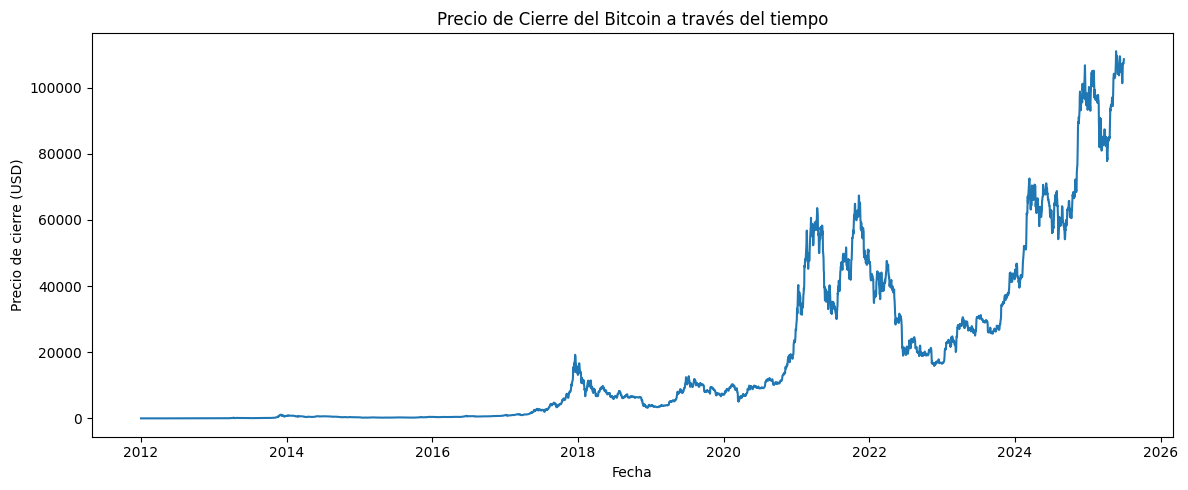

In [30]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_diario, x=df_diario.index, y="Close")

plt.title("Precio de Cierre del Bitcoin a través del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre (USD)")
plt.tight_layout()
plt.show()